# Lab 3 : Working with Neural Networks

---


Total Points: **100 points**


Submission Deadline :  **12th-Apr-2024 (10:00 AM)**


---



General Instructions:
---

1. **Code Readability** is very important.
* Modularize your code by making use
of classes and functions that can be flexibly reused wherever necessary.
* Use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as required.
2. Students are expected to follow the **honor code** of the class.

Note: **For any enquiry please write to surbhi.19csz0011@iitrpr.ac.in or akanksha.22csz0001@iitrpr.ac.in**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



In this lab, we will perform **clustering** and **classification** tasks.
We will consider “Ecommerce.csv” for the clustering problem, “Facial_Emotion_Recognition.zip” for CNN based multi-class classification, and “winequality.csv” for MLP formulation. All these datasets are available at following link:
https://drive.google.com/drive/folders/1dnTzyeKZrErhJVuGkUVwEaTCoR-Yf2iW?usp=drive_link




---



Section 1: MLP  **(Total points = 45)**

---


*   **Task Overview:**
Given a dataset containing 1600 entries offering information about physical and chemical properties of red wine variants.The target variable is the wine quality rating. Use this dataset to predict wine quality based on measurable factors, potentially aiding in the wine making process.

*   **Dataset Split:**
X_train, X_test, Y_train, Y_test = train_test_split(Data, Labels, test_size=0.20, random_state=42)

Develop a Multi-Layer Perceptron (MLP) Neural Network to predict the Wine Quality (Dataset is provided as a CSV file).

**Use of built-in library functions for the specific implementation as asked in the questions are not allowed in this section.**

1. Perform an exploratory analysis on the given dataset. Print the avg, max & min values of each column. Perform data pre-processing operations like standardization and splitting (80:20) of data. **(4 points)**

2. Implement the three layer fully connected MLP feedforward model with only one hidden layer having 15 hidden units + bias. For this problem make your decision on the number of output units. Also, your implementation should facilitate a choice between Sigmoid & Tanh activations at each layer of MLP for the user. **(13 points)**

3. Implement Back-propagation algorithm to train the parameters of the MLP created in the previous section. The Backpropagation should support gradient flow for both Sigmoid and Tanh activation functions. **(13 points)**

4. Train your model using the “cross-entropy” loss. Mention your choices of the hyperparameters for training. Perform training with batch gradient descent and stochastic gradient descent. Plot the graph of training error versus Epochs for both the training methods. Report the final accuracy you achieved on the Test Data using both the training methods. **(2+3 = 5)**

5. Using the best training method from the above training, train your MLP with different learning rates given as [ 0.5, 0.1, 0.01, 0.001, 0.0001]. **(5 points)**
6. Plot the training error versus epochs for each learning rate in a single line graph. Also, plot accuracy versus learning rate. Comment on your observations. **(3+2 = 5 points)**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [ ]:
def scalar(x):
    return (x-x.mean())/x.std()

# Task1

In [ ]:
#Write your code here
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv(r"/content/drive/MyDrive/ML_LAB3/winequality.csv",sep=';')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Summary statistics
print("\nSummary statistics:")
print(data.describe())

# Calculate average, maximum, and minimum values of each column
print("\nAverage values of each column:")
print(data.mean())

print("\nMaximum values of each column:")
print(data.max())

print("\nMinimum values of each column:")
print(data.min())

# Data preprocessing
# Splitting the data into features (X) and target variable (y)
X1 = data.drop(columns=['quality'])  # Features
y1 = data['quality']  # Target variable

# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train = scalar(X_train).values
X_test = scalar(X_test).values
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values


# Print the shape of training and testing sets
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


First few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8 

# Task 2 & Task 3

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation = activation

        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * np.sqrt(1/self.input_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * np.sqrt(1/self.hidden_size)
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def softmax(self, x):
        exp_x = np.exp(x)
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        if self.activation == 'sigmoid':
            self.a1 = self.sigmoid(self.z1)
        else:
            self.a1 = self.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.y_pred = self.softmax(self.z2)
        return self.y_pred

    def backward(self, X, y, lr):
        m = X.shape[0]

        # Compute gradients
        dz2 = self.y_pred - y
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.mean(dz2, axis=0, keepdims=True)

        if self.activation == 'sigmoid':
            da1 = np.dot(dz2, self.W2.T) * self.a1 * (1 - self.a1)
        else:
            da1 = np.dot(dz2, self.W2.T) * (1 - self.a1 ** 2)
        dz1 = np.dot(X.T, da1) / m
        dW1 = dz1
        db1 = np.mean(da1, axis=0, keepdims=True)

        # Update weights and biases
        self.W2 -= lr * dW2
        self.b2 -= lr * db2
        self.W1 -= lr * dW1
        self.b1 -= lr * db1

        return self.y_pred

In [ ]:
def train(X_train, y_train, batch_size = 32, lr = 0.01, epochs = 1000):
    nn = NeuralNetwork(X_train.shape[1], 128, y_train.shape[1])
    loss_s = []
    for i in range(epochs):
        loss_batch = []
        for j in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[j:j+batch_size]
            y_batch = y_train[j:j+batch_size]
            y_pred = nn.forward(X_batch)
            nn.backward(X_batch, y_batch, lr)
            loss = -np.sum(y_batch * np.log(y_pred)) / y_batch.shape[0]
            loss_batch.append(loss)
        loss_s.append(np.mean(loss_batch))
    return loss_s, nn


# Task 4

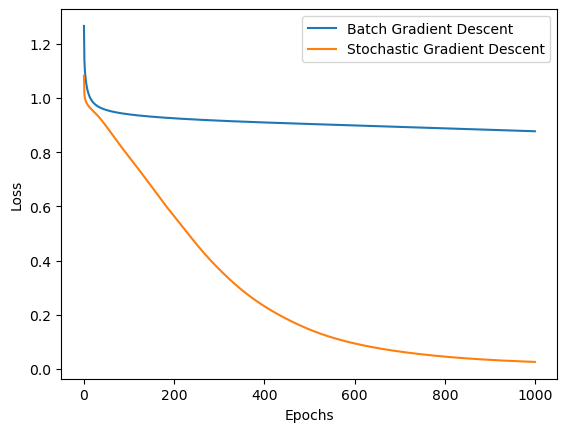

In [ ]:
loss_batch, nn_batch = train(X_train, y_train, batch_size=32, lr=0.01, epochs=1000)
loss_stochastic, nn_stochastic = train(X_train, y_train, batch_size=1, lr=0.01, epochs=1000)
# plotting the loss vs epochs for batch and stochastic gradient descent
plt.plot(loss_batch, label='Batch Gradient Descent')
plt.plot(loss_stochastic, label='Stochastic Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




In [ ]:
#Write your code here
# find final accuracy of the model for test data
def accuracy(X_test, y_test, nn):
    y_pred = nn.forward(X_test)
    correct = np.sum(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
    return correct / y_test.shape[0]
# find final accuracy of the model for test data
accuracy_batch = accuracy(X_test, y_test, nn_batch)
accuracy_stochastic = accuracy(X_test, y_test, nn_stochastic)
print("Accuracy of the model using batch gradient descent:", accuracy_batch)
print("Accuracy of the model using stochastic gradient descent:", accuracy_stochastic)



Accuracy of the model using batch gradient descent: 0.55625
Accuracy of the model using stochastic gradient descent: 0.646875


# Task 5 & Task 6

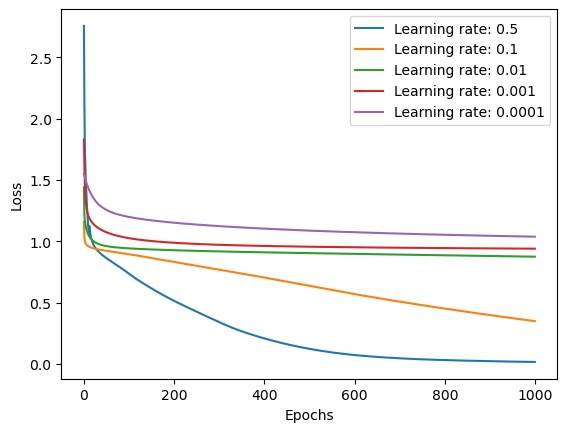

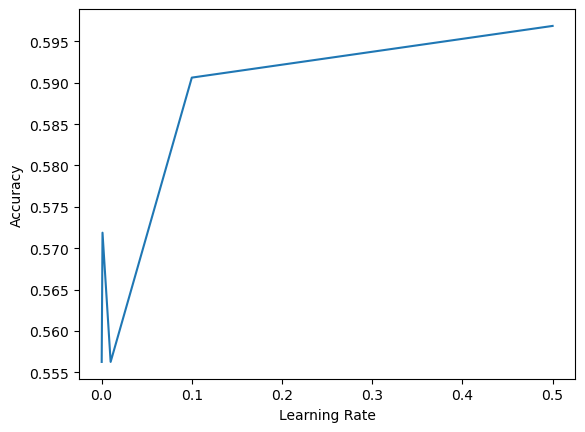

In [ ]:
loss_stochastic, nn_stochastic = train(X_train, y_train, batch_size=1, lr=0.01, epochs=1000)
learning_rates=[0.5, 0.1, 0.01, 0.001, 0.0001]
accuracies=[]
for lr in learning_rates:
    loss, nn = train(X_train, y_train, batch_size=32, lr=lr, epochs=1000)
    # plotting the loss vs epochs for different learning rates
    plt.plot(loss, label='Learning rate: {}'.format(lr))
    # plot accuracy versus learning rate
    acc = accuracy(X_test, y_test, nn)
    accuracies.append(acc)


plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(learning_rates, accuracies)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.show()


# Observation
Loss tends to decrease with increasing learning rate.
Testing Accuracy fluctuates at lower learning rates. However at higher learning rates it tends to stabilize.


---




---
**Description of Dataset:**

*   The dataset consists of grayscale images portraying faces with dimensions of 48x48 pixels. The images have undergone automatic alignment to ensure that each face is approximately centered, maintaining a consistent amount of space in every image.
*  The primary objective is to categorize each face based on the expressed emotion, assigning it to one of three categories: Happy (0), Sad (1), or Neutral (2). The training set encompasses 17,109 examples, while the public test set comprises 4,254 examples.


 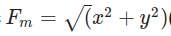



3. **Implement Sequential CNN Model** : Utilize the Keras library to implement a sequential Convolutional Neural Network (CNN) model for facial emotion classification. Adopt the following network architecture for the CNN model:


* Input layer
* Con2D with 128 neurons 3x3 kernels and ReLU activation.
* Con2D with 64 neurons 3x3 kernels and ReLU activation with batch normalization.
* Max Pooling layer with pool-size 2x2 and padding as 'valid'.
* Con2D with 16 neurons 3x3 kernels and ReLU activation and stride 2.
* Con2D with 10 neurons 3x3 kernels and ReLU activation.
* Max Pooling layer with pool-size 2x2 and padding as 'valid'.
* Batch normalization
* Fully Connected Dense Layer with 128 neurons , relu activation and L2 kernel regularizer with factor of 0.05.
* Dropout of 30% ie. 0.3
* Fully Connected Dense Layer with number of classes neurons and softmax activation.



# Task 1

In [ ]:
import os
import cv2
import pandas as pd

# Define the directories where the images are stored
directories = [r'Facial_Emotion_Recognition\Image_dataset\train\happy', r'Facial_Emotion_Recognition\Image_dataset\train\neutral', r'Facial_Emotion_Recognition\Image_dataset\train\sad']

data = []

# Loop through all directories
for directory in directories:
    # Loop through all files in the directory
    emotion_label = os.path.basename(directory)
    print(emotion_label)
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Add more conditions if there are other image types
            # Read the image
            img = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # Flatten the image and append to the data list along with its label
                data.append([' '.join(map(str, img.flatten())),emotion_label])

# Convert the data list to a DataFrame
df = pd.DataFrame(data, columns=['pixels', 'emotion'])

In [ ]:
df.head()

,pixels,emotion
0,255 254 255 252 255 253 255 233 134 88 72 88 7...,happy
1,42 56 60 64 60 72 77 83 96 109 92 76 64 47 41 ...,happy
2,15 13 14 26 21 45 77 91 108 123 127 131 130 12...,happy
3,152 132 132 147 174 157 137 123 139 158 147 13...,happy
4,252 254 255 252 252 248 233 218 208 180 148 13...,happy


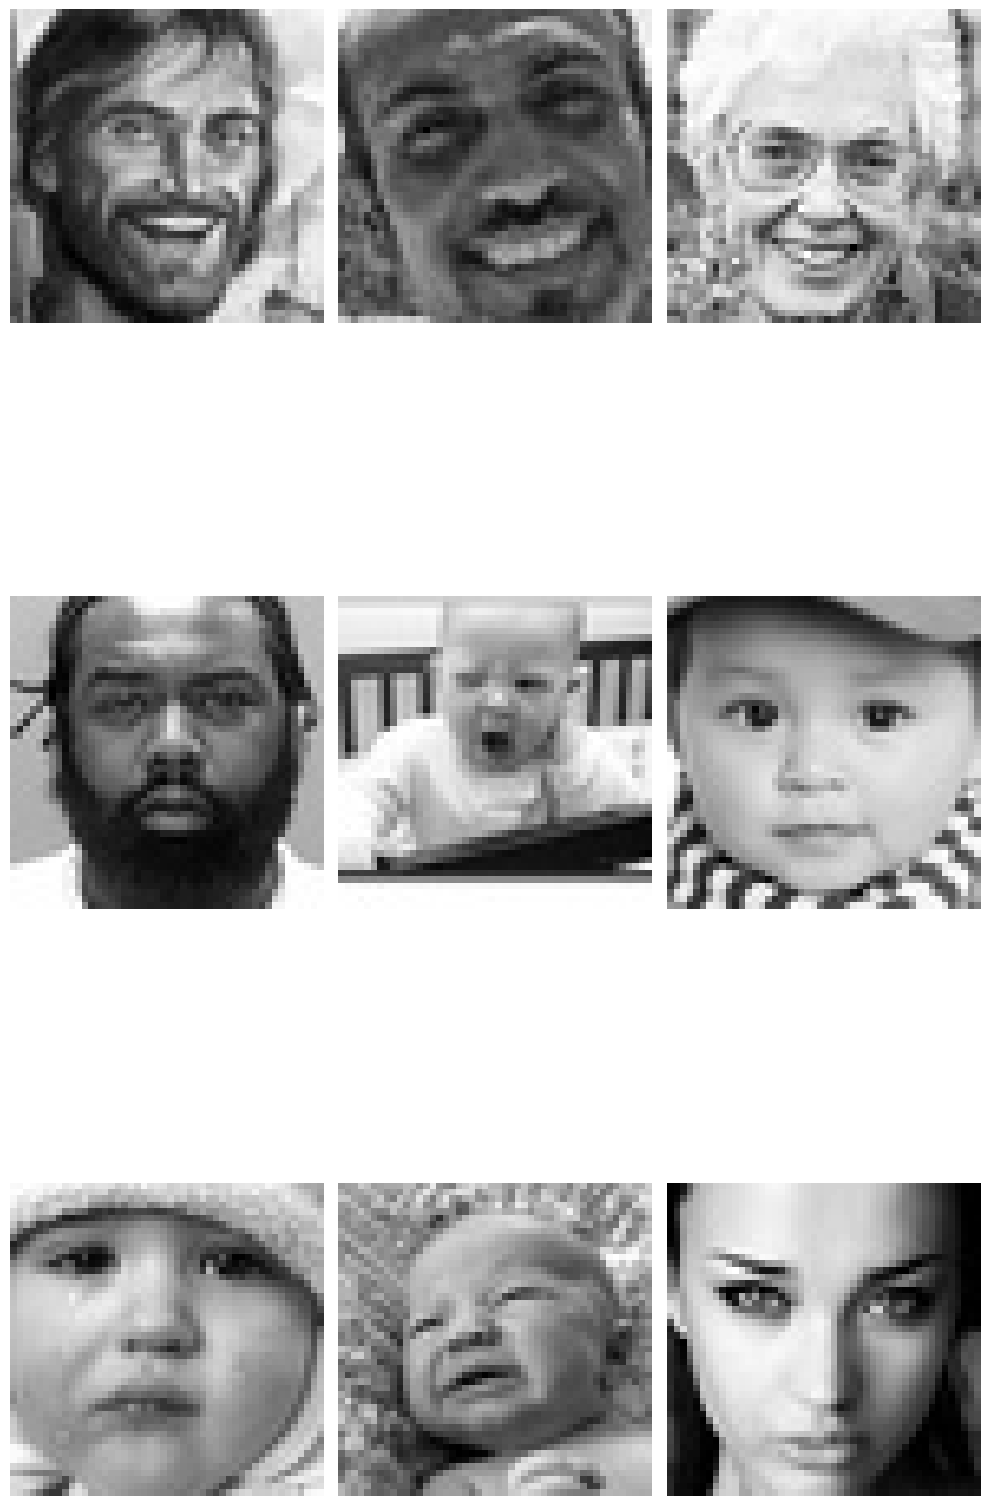

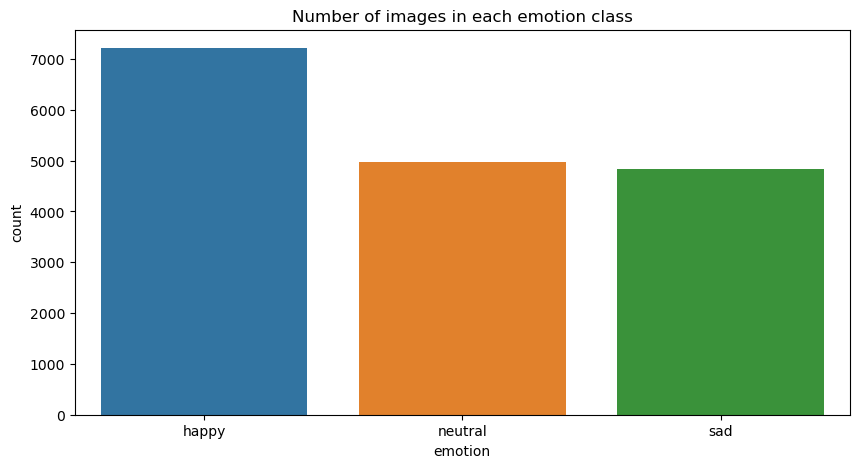

Distribution is uniform: False


In [ ]:
#Write your code here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame and it has a column 'emotion' for labels and 'pixels' for image data
# Convert pixels to numpy arrays
df['pixels'] = df['pixels'].apply(lambda pixel_sequence: np.array(pixel_sequence.split(' ')).reshape(48, 48).astype('float32'))

# Display three randomly selected images from each class
emotion_labels = df['emotion'].unique()
fig, axs = plt.subplots(len(emotion_labels), 3, figsize=(10, 20))
for i, emotion in enumerate(emotion_labels):
    samples = df[df['emotion'] == emotion].sample(3)
    for j, image_pixels in enumerate(samples['pixels']):
        axs[i, j].imshow(image_pixels, cmap='gray')
        axs[i, j].axis('off')
plt.tight_layout()
plt.show()

# Generate a distribution plot illustrating the number of images in each emotion class
plt.figure(figsize=(10, 5))
sns.countplot(x='emotion', data=df)
plt.title('Number of images in each emotion class')
plt.show()

# Check if the distribution is uniform
counts = df['emotion'].value_counts()
print("Distribution is uniform:", np.all(counts == counts.iloc[0]))

Number of neutral and sad images are nearly equal . But number of happy images are significantly more than the other two classes

# Task 2

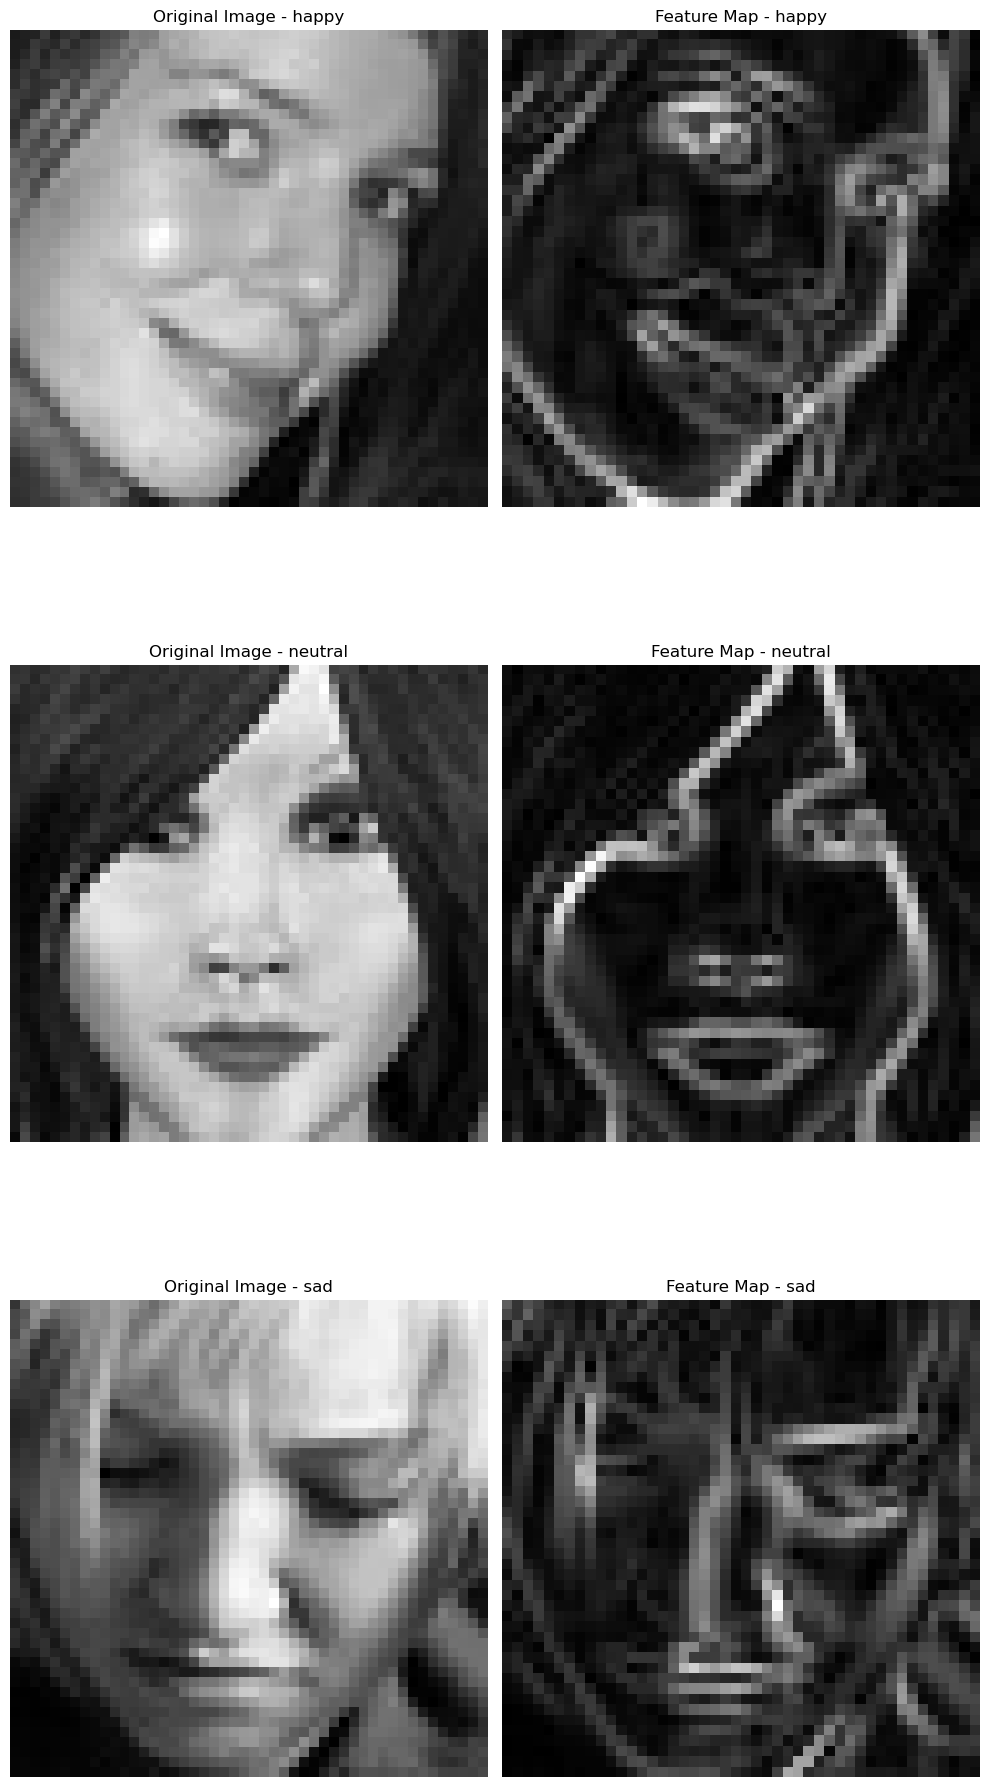

In [ ]:
#Write your code here
import numpy as np
import matplotlib.pyplot as plt

def conv2d(image, kernel):
    m, n = kernel.shape
    y, x = image.shape
    y = y - m + 1
    x = x - m + 1
    new_image = np.zeros((y,x))
    for i in range(y):
        for j in range(x):
            new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Display the feature map for one example from each emotion class
# Display the feature map for one example from each emotion class
emotion_labels = df['emotion'].unique()
fig, axs = plt.subplots(len(emotion_labels), 2, figsize=(10, 20))
for i, emotion in enumerate(emotion_labels):
    sample = df[df['emotion'] == emotion].sample(1)
    image_pixels = sample['pixels'].values[0].reshape(48, 48)  # directly reshape the numpy array
    axs[i, 0].imshow(image_pixels, cmap='gray')
    axs[i, 0].set_title(f'Original Image - {emotion}')
    axs[i, 0].axis('off')

    # Apply Sobel kernels
    gx = conv2d(image_pixels, sobel_x)
    gy = conv2d(image_pixels, sobel_y)
    # Calculate feature map
    fm = np.sqrt(gx**2 + gy**2)
    axs[i, 1].imshow(fm, cmap='gray')
    axs[i, 1].set_title(f'Feature Map - {emotion}')
    axs[i, 1].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
df['emotion'] = df['emotion'].replace({'happy': 0, 'sad': 1, 'neutral': 2})
df = pd.get_dummies(df, columns=['emotion'])
df.head()


,pixels,emotion_0,emotion_1,emotion_2
0,"[[255.0, 254.0, 255.0, 252.0, 255.0, 253.0, 25...",1,0,0
1,"[[42.0, 56.0, 60.0, 64.0, 60.0, 72.0, 77.0, 83...",1,0,0
2,"[[15.0, 13.0, 14.0, 26.0, 21.0, 45.0, 77.0, 91...",1,0,0
3,"[[152.0, 132.0, 132.0, 147.0, 174.0, 157.0, 13...",1,0,0
4,"[[252.0, 254.0, 255.0, 252.0, 252.0, 248.0, 23...",1,0,0


# Task 3

In [ ]:
#Write your code here
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.regularizers import l2

num_classes = 3  # replace with the actual number of classes
input_shape = (48, 48, 1)  # replace with the actual input shape

model = Sequential([
    Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), padding='valid'),
    Conv2D(16, kernel_size=(3, 3), strides=(2, 2), activation='relu'),
    Conv2D(10, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), padding='valid'),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.05)),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\roopam\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
directories1 = [r'Facial_Emotion_Recognition\Image_dataset\test\happy', r'Facial_Emotion_Recognition\Image_dataset\test\neutral', r'Facial_Emotion_Recognition\Image_dataset\test\sad']

data1 = []

# Loop through all directories
for directory in directories1:
    # Loop through all files in the directory
    emotion_label = os.path.basename(directory)
    #print(emotion_label)
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Add more conditions if there are other image types
            # Read the image
            img = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # Flatten the image and append to the data list along with its label
                data1.append([' '.join(map(str, img.flatten())),emotion_label])

# Convert the data list to a DataFrame
df1 = pd.DataFrame(data1, columns=['pixels', 'emotion'])

In [ ]:
df1['emotion'] = df1['emotion'].replace({'happy': 0, 'sad': 1, 'neutral': 2})
df1 = pd.get_dummies(df1, columns=['emotion'])
df1['pixels'] = df1['pixels'].apply(lambda pixel_sequence: np.array(pixel_sequence.split(' ')).reshape(48, 48).astype('float32'))
df1.head()

,pixels,emotion_0,emotion_1,emotion_2
0,"[[200.0, 208.0, 186.0, 179.0, 173.0, 160.0, 18...",1,0,0
1,"[[92.0, 94.0, 90.0, 91.0, 89.0, 87.0, 88.0, 87...",1,0,0
2,"[[226.0, 223.0, 141.0, 101.0, 26.0, 13.0, 8.0,...",1,0,0
3,"[[255.0, 253.0, 253.0, 255.0, 234.0, 174.0, 16...",1,0,0
4,"[[105.0, 41.0, 54.0, 42.0, 49.0, 65.0, 68.0, 6...",1,0,0


In [ ]:
#Write your code here
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [ ]:
#Write your code here
X_train= np.stack(df['pixels'].values) /255.0
y_train = df[['emotion_0', 'emotion_1', 'emotion_2']].values
X_test= np.stack(df1['pixels'].values) /255.0
y_test = df1[['emotion_0', 'emotion_1', 'emotion_2']].values



In [ ]:
def train_model(optimizer):
    model = Sequential([
        Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), padding='valid'),
        Conv2D(16, kernel_size=(3, 3), strides=(2, 2), activation='relu'),
        Conv2D(10, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2), padding='valid'),
        BatchNormalization(),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.05)),
        Dropout(0.3),
        Dense(3, activation='softmax')
    ])

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(min_delta=0.01, patience=2)

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[early_stopping])

    plt.plot(history.history['loss'])
    plt.title(f'Training Loss with {optimizer}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

Epoch 1/10


c:\Users\roopam\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


532/532 ━━━━━━━━━━━━━━━━━━━━ 113s 210ms/step - accuracy: 0.4295 - loss: 6.7156 - val_accuracy: 0.5118 - val_loss: 3.4295
Epoch 2/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 113s 213ms/step - accuracy: 0.5314 - loss: 2.8824 - val_accuracy: 0.5576 - val_loss: 1.7756
Epoch 3/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 118s 221ms/step - accuracy: 0.5801 - loss: 1.5710 - val_accuracy: 0.6013 - val_loss: 1.1919
Epoch 4/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 117s 220ms/step - accuracy: 0.6103 - loss: 1.0899 - val_accuracy: 0.6100 - val_loss: 0.9697
Epoch 5/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 113s 213ms/step - accuracy: 0.6256 - loss: 0.9065 - val_accuracy: 0.6008 - val_loss: 0.9005
Epoch 6/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 111s 209ms/step - accuracy: 0.6420 - loss: 0.8269 - val_accuracy: 0.6055 - val_loss: 0.8786
Epoch 7/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 112s 211ms/step - accuracy: 0.6561 - loss: 0.7872 - val_accuracy: 0.6408 - val_loss: 0.8019
Epoch 8/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 112s 210ms/step - accuracy: 0.6689 - loss: 0.76

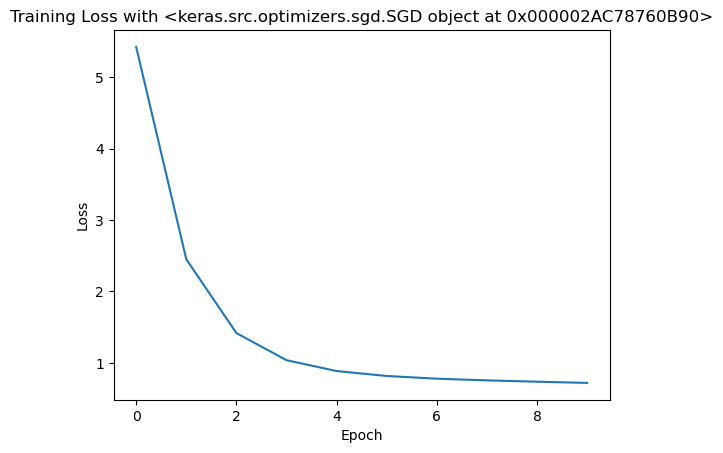

Epoch 1/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 113s 210ms/step - accuracy: 0.4510 - loss: 3.1891 - val_accuracy: 0.5724 - val_loss: 0.9693
Epoch 2/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 112s 210ms/step - accuracy: 0.5694 - loss: 0.9463 - val_accuracy: 0.5428 - val_loss: 0.9920
Epoch 3/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 111s 209ms/step - accuracy: 0.6181 - loss: 0.8558 - val_accuracy: 0.6410 - val_loss: 0.8181
Epoch 4/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 111s 209ms/step - accuracy: 0.6415 - loss: 0.8278 - val_accuracy: 0.5973 - val_loss: 0.9300
Epoch 5/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 111s 209ms/step - accuracy: 0.6491 - loss: 0.8057 - val_accuracy: 0.6220 - val_loss: 0.8766


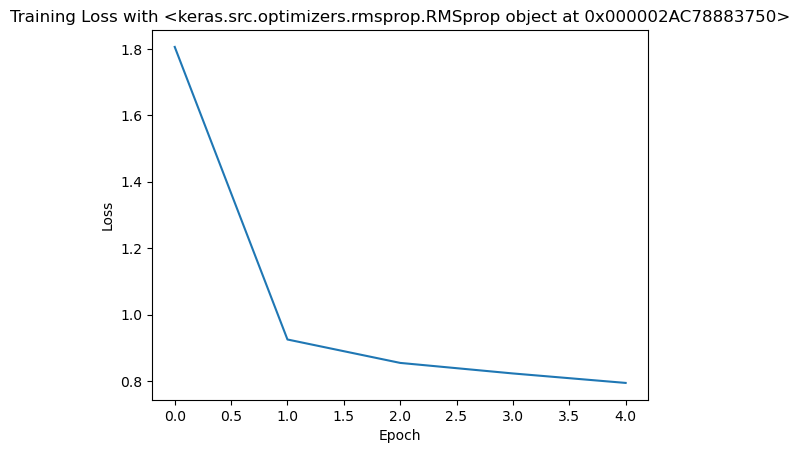

Epoch 1/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 113s 209ms/step - accuracy: 0.4613 - loss: 3.7918 - val_accuracy: 0.5776 - val_loss: 0.9842
Epoch 2/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 110s 207ms/step - accuracy: 0.5876 - loss: 0.9399 - val_accuracy: 0.4711 - val_loss: 1.1138
Epoch 3/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 118s 222ms/step - accuracy: 0.6308 - loss: 0.8624 - val_accuracy: 0.6081 - val_loss: 0.8855
Epoch 4/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 114s 214ms/step - accuracy: 0.6527 - loss: 0.8231 - val_accuracy: 0.4981 - val_loss: 0.9994
Epoch 5/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 110s 207ms/step - accuracy: 0.6702 - loss: 0.7895 - val_accuracy: 0.6128 - val_loss: 0.8810


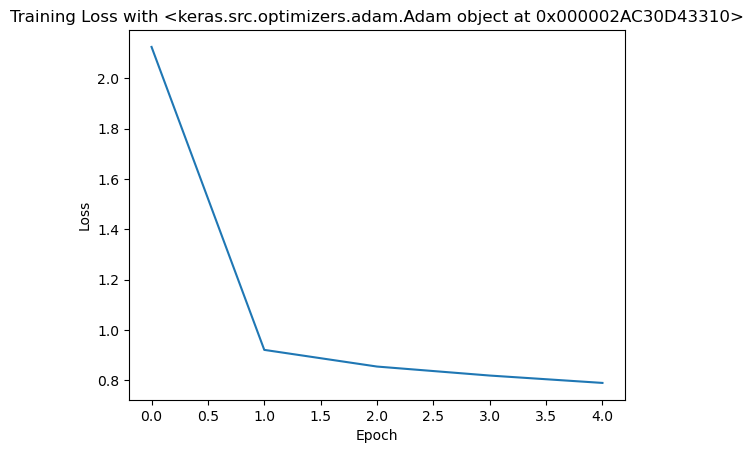

Epoch 1/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 112s 208ms/step - accuracy: 0.3977 - loss: 7.8054 - val_accuracy: 0.4520 - val_loss: 6.4889
Epoch 2/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 110s 207ms/step - accuracy: 0.4683 - loss: 6.2296 - val_accuracy: 0.4918 - val_loss: 5.4642
Epoch 3/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 111s 209ms/step - accuracy: 0.5102 - loss: 5.2630 - val_accuracy: 0.5092 - val_loss: 4.7320
Epoch 4/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 112s 210ms/step - accuracy: 0.5238 - loss: 4.5837 - val_accuracy: 0.5259 - val_loss: 4.1766
Epoch 5/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 120s 226ms/step - accuracy: 0.5452 - loss: 4.0553 - val_accuracy: 0.5489 - val_loss: 3.7312
Epoch 6/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 115s 217ms/step - accuracy: 0.5484 - loss: 3.6429 - val_accuracy: 0.5595 - val_loss: 3.3669
Epoch 7/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 115s 217ms/step - accuracy: 0.5610 - loss: 3.2894 - val_accuracy: 0.5583 - val_loss: 3.0769
Epoch 8/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 116s 218ms/step - accuracy: 0.5744 -

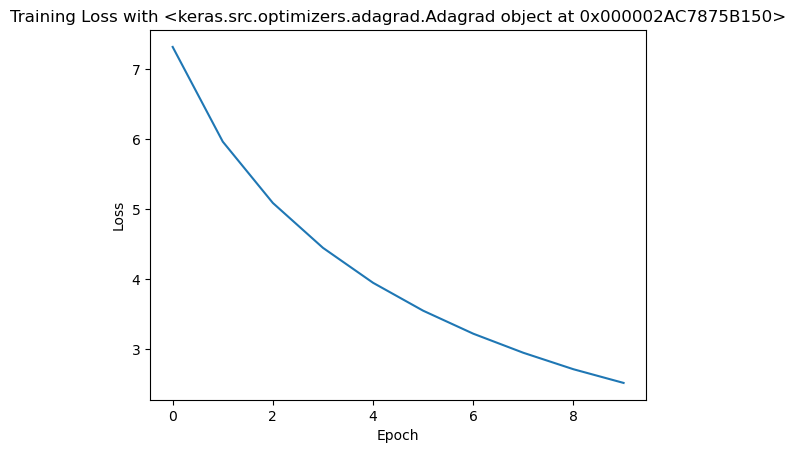

In [ ]:
optimizers = [SGD(), RMSprop(), Adam(), Adagrad()]

for optimizer in optimizers:
    train_model(optimizer)

# Task 5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

model = Sequential([
        Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), padding='valid'),
        Conv2D(16, kernel_size=(3, 3), strides=(2, 2), activation='relu'),
        Conv2D(10, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2), padding='valid'),
        BatchNormalization(),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.05)),
        Dropout(0.3),
        Dense(3, activation='softmax')
    ])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(min_delta=0.01, patience=2)

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[early_stopping])

# Load the trained model
# model = load_model('path_to_your_model')

# Select two intermediate layers
layer_names = ['layer_name_1', 'layer_name_2']
intermediate_layers = [layer for layer in model.layers if layer.name in layer_names]

# Create a new model that will return these layers' outputs
intermediate_model = Model(inputs=model.input, outputs=[layer.output for layer in intermediate_layers])

# Randomly select 10 images
indices = np.random.choice(len(X), size=10, replace=False)
images = X[indices]

# Preprocess the images if necessary
# images = preprocess(images)

# Get the activation maps
activations = intermediate_model.predict(images)

# Plot the activation maps
for i, activation in enumerate(activations):
    for j in range(10):
        plt.figure(figsize=(10, 10))
        plt.subplot(10, 2, i*2+j+1)
        plt.imshow(activation[j])
        plt.title(f'Activation of {layer_names[i]} for image {j+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

c:\Users\roopam\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 126s 229ms/step - accuracy: 0.4563 - loss: 3.6698 - val_accuracy: 0.5421 - val_loss: 1.0298
Epoch 2/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 124s 232ms/step - accuracy: 0.5849 - loss: 0.9438 - val_accuracy: 0.6039 - val_loss: 0.8976
Epoch 3/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 119s 224ms/step - accuracy: 0.6067 - loss: 0.8865 - val_accuracy: 0.6265 - val_loss: 0.8706
Epoch 4/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 114s 215ms/step - accuracy: 0.6337 - loss: 0.8388 - val_accuracy: 0.6302 - val_loss: 0.8462
Epoch 5/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 115s 217ms/step - accuracy: 0.6627 - loss: 0.7999 - val_accuracy: 0.6345 - val_loss: 0.8300
Epoch 6/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 114s 214ms/step - accuracy: 0.6744 - loss: 0.7822 - val_accuracy: 0.6335 - val_loss: 0.8526
Epoch 7/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 117s 221ms/step - accuracy: 0.6819 - loss: 0.7590 - val_accuracy: 0.6413 - val_loss: 0.8145
Epoch 8/10
532/532 ━━━━━━━━━━━━━━━━━━━━ 121s 228ms/step - accuracy: 0.6993 -

ValueError: The layer sequential_10 has never been called and thus has no defined input.

In [ ]:
# Write your code here




---
Clustering  
---
---


In [ ]:
#Write your code here
data_new=pd.read_csv(r"Ecommerce.csv",sep=',')
data_new.head()

,ProductID,StockCode,Product_Details,Product_Count,Product_UnitPrice,Cus_ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,India
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,India
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,India
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,India
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,India


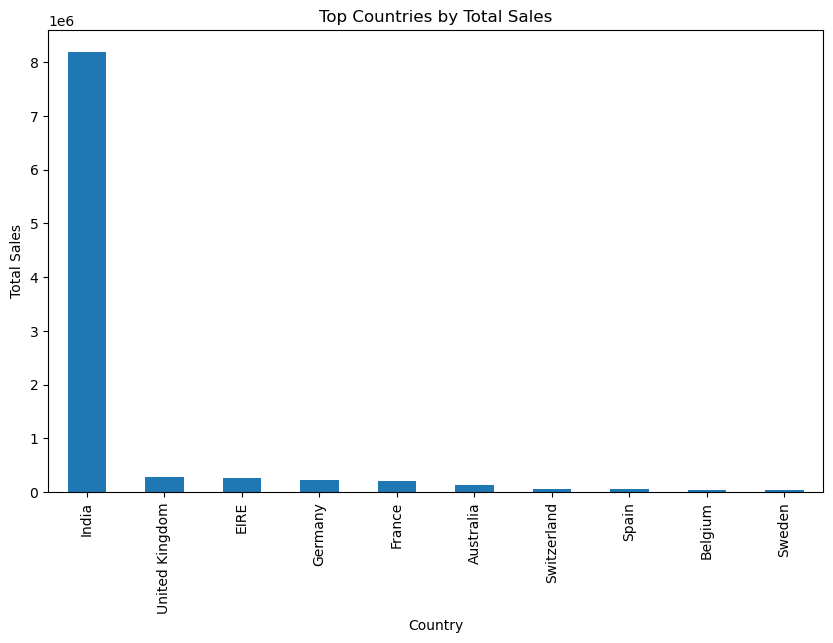

In [ ]:
#Write your code here

# Calculate total sales for each row

data_new['Total_Sales'] = data_new['Product_Count'] * data_new['Product_UnitPrice']
# Calculate total sales for each country
country_sales=data_new.groupby('Country')['Total_Sales'].sum().sort_values(ascending=False)
# Plot the top countries by total sales
top_countries = country_sales[:10]  # Select top 10 countries
top_countries.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Top Countries by Total Sales')
plt.show()

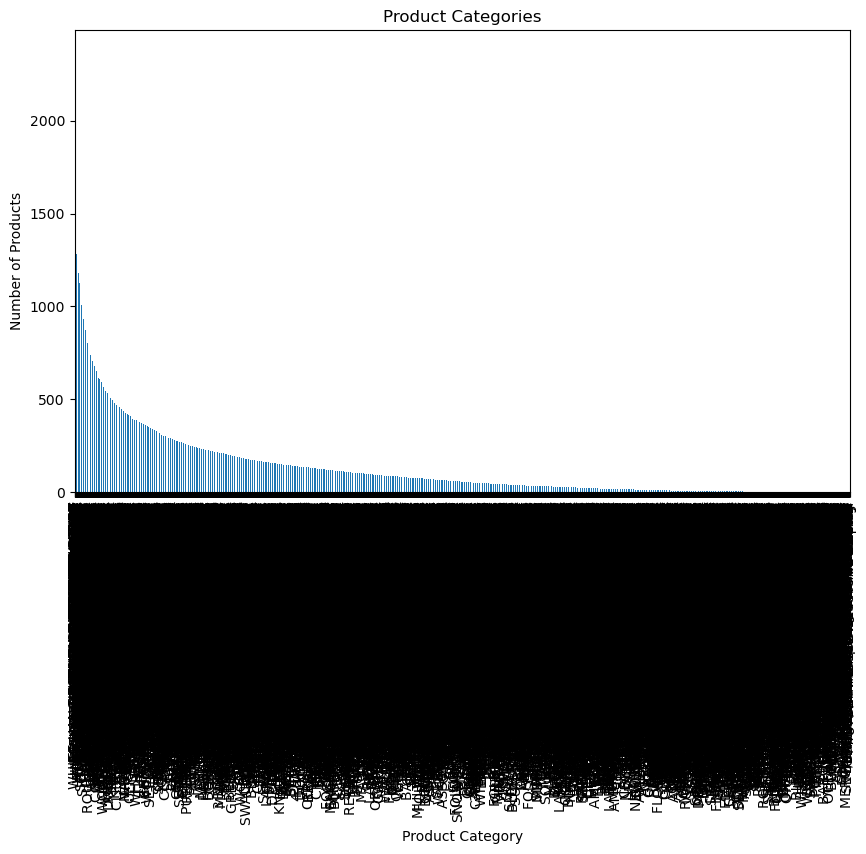

In [ ]:
# Count the number of products in each category
product_counts = data_new['Product_Details'].value_counts()

# Plot the product categories
product_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.title('Product Categories')
plt.show()

In [ ]:


# Check the data types of the columns
print(data_new.dtypes)

# Check for missing values
print(data_new.isnull().sum())

# Handle missing values
# Option 1: Drop rows with missing values
data_new = data_new.dropna()


ProductID             object
StockCode             object
Product_Details       object
Product_Count          int64
Product_UnitPrice    float64
Cus_ID               float64
Country               object
Total_Sales          float64
dtype: object
ProductID                 0
StockCode                 0
Product_Details        1454
Product_Count             0
Product_UnitPrice         0
Cus_ID               135080
Country                   0
Total_Sales               0
dtype: int64


In [ ]:
features = data_new[['Product_Count', 'Product_UnitPrice']]
normalized_features = (features - features.mean()) / features.std()

In [ ]:
def initialize_centroids(X, k):

    indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[indices]
    return centroids

def assign_clusters(X, centroids):

    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    clusters = np.argmin(distances, axis=0)
    return clusters

def update_centroids(X, clusters, k):

    centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
    return centroids

def kmeans(X, k, max_iterations=100):

    centroids = initialize_centroids(X, k)
    for _ in range(max_iterations):

        clusters = assign_clusters(X, centroids)

        new_centroids = update_centroids(X, clusters, k)

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

k = 3

X = normalized_features.values

clusters, centroids = kmeans(X, k)

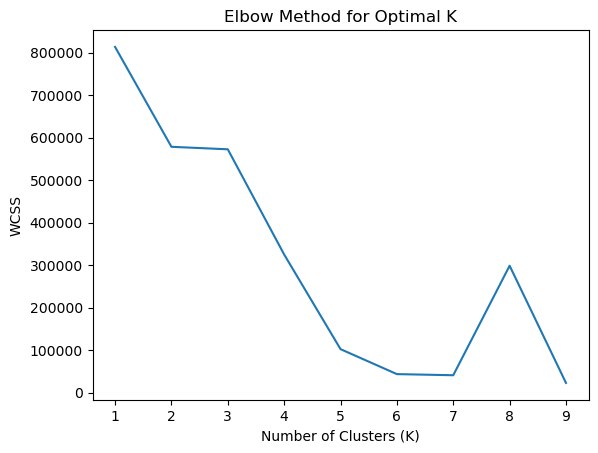

In [ ]:
def compute_wcss(X, centroids, clusters):

    wcss = 0
    for i in range(k):
        cluster_points = X[clusters == i]
        wcss += np.sum((cluster_points - centroids[i])**2)
    return wcss

wcss_values = []
for k in range(1, 10):
    clusters, centroids = kmeans(X, k)
    wcss = compute_wcss(X, centroids, clusters)
    wcss_values.append(wcss)

plt.plot(range(1, 10), wcss_values)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
def initialize_medoids(X, k):

    indices = np.random.choice(X.shape[0], k, replace=False)
    medoids = X[indices]
    return medoids

def assign_clusters_medoids(X, medoids):

    distances = np.sqrt(((X - medoids[:, np.newaxis])**2).sum(axis=2))
    clusters = np.argmin(distances, axis=0)
    return clusters

def update_medoids(X, clusters, k):
    medoids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
    return medoids

def kmedoids(X, k, max_iterations=100):

    medoids = initialize_medoids(X, k)
    for _ in range(max_iterations):

        clusters = assign_clusters_medoids(X, medoids)

        new_medoids = update_medoids(X, clusters, k)

        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids
    return clusters, medoids

k = 3

X = normalized_features.values

clusters_medoids, medoids = kmedoids(X, k)

C:\Users\roopam\AppData\Local\Temp\ipykernel_13612\2605705122.py:14: RuntimeWarning: Mean of empty slice.
  medoids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
c:\Users\roopam\anaconda3\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


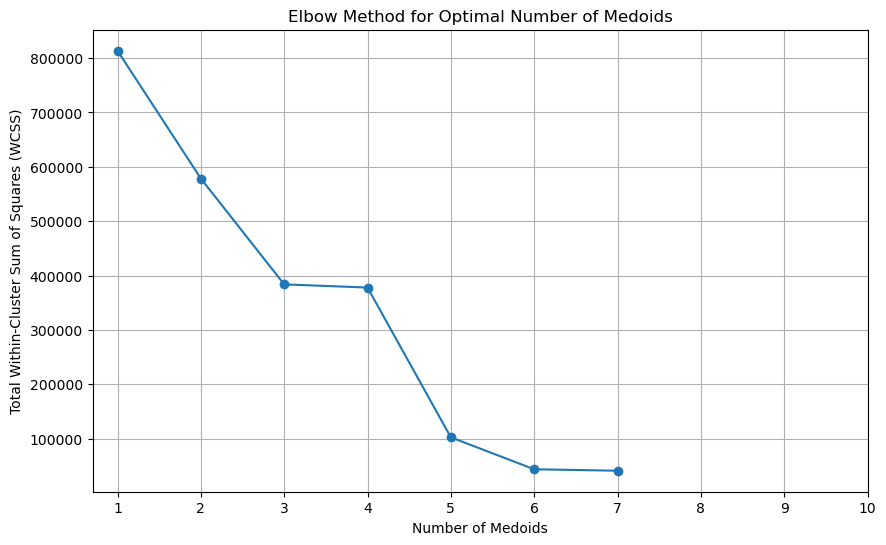

In [ ]:
def calculate_wcss(X, medoids, clusters):
    wcss = 0
    for i in range(len(medoids)):
        cluster_points = X[clusters == i]
        wcss += np.sum((cluster_points - medoids[i])**2)
    return wcss

wcss_values = []
num_medoids_range = range(1, 11)

for num_medoids in num_medoids_range:
    _, medoids = kmedoids(X, num_medoids)
    clusters = assign_clusters_medoids(X, medoids)
    wcss = calculate_wcss(X, medoids, clusters)
    wcss_values.append(wcss)

plt.figure(figsize=(10, 6))
plt.plot(num_medoids_range, wcss_values, marker='o')
plt.title('Elbow Method for Optimal Number of Medoids')
plt.xlabel('Number of Medoids')
plt.ylabel('Total Within-Cluster Sum of Squares (WCSS)')
plt.xticks(num_medoids_range)
plt.grid(True)
plt.show()

[0 0 0 ... 0 0 0]


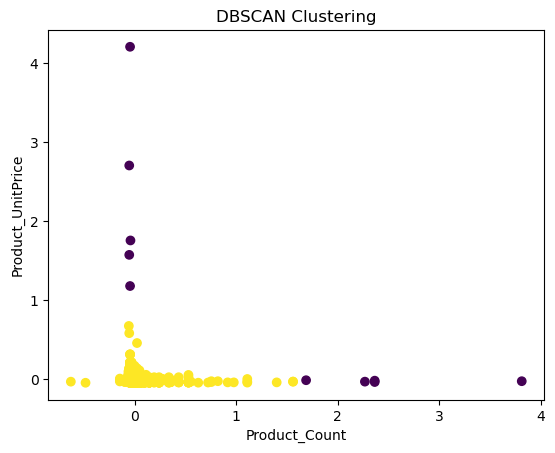

In [ ]:
import numpy as np
import sys
sys.setrecursionlimit(10000)
def dbscan(X, eps, min_samples):
    # Compute pairwise distances
    dists = np.sqrt(((X[:, None] - X) ** 2).sum(axis=2))

    # Identify core points
    core_points = np.sum(dists < eps, axis=1) >= min_samples

    # Initialize clusters and current cluster label
    clusters = np.full(X.shape[0], -1)
    current_cluster = 0

    # Function to expand the cluster
    def expand_cluster(point):
        # Assign the point to the current cluster
        clusters[point] = current_cluster

        # Get the points within eps of the current point
        neighbors = np.where(dists[point] < eps)[0]

        # If any of the neighbors are core points, expand the cluster from them
        for neighbor in neighbors:
            if core_points[neighbor] and clusters[neighbor] == -1:
                expand_cluster(neighbor)

    # Expand clusters from each unassigned core point
    for point in range(X.shape[0]):
        if core_points[point] and clusters[point] == -1:
            expand_cluster(point)
            current_cluster += 1

    return clusters

# Use the function
d = normalized_features.values[0:len(normalized_features):100]
clusters = dbscan(d, eps=0.5, min_samples=5)

# Add cluster labels to the original data
# data_new['Cluster_DBSCAN'] = clusters
print(clusters)
# Plot the clusters
plt.scatter(d[:, 0], d[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Product_Count')
plt.ylabel('Product_UnitPrice')
plt.title('DBSCAN Clustering')
plt.show()
